In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# All timings are in milliseconds (ms)
l_odorspace = 2
odor = np.random.uniform(0,1,l_odorspace)

In [11]:
def generate_orn(duration,resolution,odorVec,odorStart,odorEnd):
    
    trace = np.zeros(int(duration/resolution))
    rec_field = np.random.uniform(0,1,l_odorspace)
    
    latency = np.random.uniform(0,200)
    t_rise = np.random.uniform(0,600)
    t_fall = np.random.uniform(0,1200)
    tuning = np.random.uniform(1,15)
    
    def sigmoid(x,a1=15,a2=0.8):
        return 1/(1+np.exp(-a1*(x-a2)))
    
    odorMag = np.linalg.norm(odorVec)
    cosSim = np.dot(odorVec,rec_field)/(np.linalg.norm(odorVec)*np.linalg.norm(rec_field))
    
    if np.arccos(cosSim) < 1.43117:
        res_strength = sigmoid(odorMag*cosSim**tuning)
    else:
        res_strength = 0
    
    #print(res_strength)
    
    if np.random.uniform()<0.5: # Sharp Response
        
        rise = np.arange(0,t_rise/2,resolution)
        rise = res_strength*2*np.exp(1)/t_rise*rise*np.exp(-2*rise/t_rise)
        
        riseStartIndex = int((odorStart+latency)/resolution)
        riseEndIndex = riseStartIndex+rise.shape[0]
        
        trace[riseStartIndex:riseEndIndex] = rise
        
        peak = rise[-1]
        
        fall = np.linspace(0,duration-riseEndIndex*resolution,trace.shape[0]-riseEndIndex)
        fall = peak*np.exp(-fall/t_fall)
        
        fallStartIndex = riseEndIndex
        trace[fallStartIndex:] = fall
    
    else:
        rise = np.arange(0,t_rise,resolution)
        rise = res_strength*np.exp(1)/t_rise*rise*np.exp(-rise/t_rise)
        
        riseStartIndex = int((odorStart+latency)/resolution)
        riseEndIndex = int((odorStart+latency)/resolution)+rise.shape[0]
        
        trace[riseStartIndex:riseEndIndex] = rise
        
        peak_1 = rise[-1]
        
        adaptation_rate = np.random.uniform(0.1,1)
        
        adaptation = np.arange(0,(int(odorEnd/resolution)-riseEndIndex)*resolution,resolution)
        if res_strength>0:
            adaptation = np.linspace(peak_1,adaptation_rate*res_strength,adaptation.shape[0],endpoint=False)
        else:
            adaptation = np.zeros(adaptation.shape)
        adaptationStartIndex = riseEndIndex
        adaptationEndIndex = adaptationStartIndex+adaptation.shape[0]
        
        trace[adaptationStartIndex:adaptationEndIndex] = adaptation
        
        peak_2 = adaptation[-1]
        
        fall = np.arange(0,(trace.shape[0]-adaptationEndIndex)*resolution,resolution)
        fall = peak_2*np.exp(-fall/t_fall)
        
        fallStartIndex = adaptationEndIndex
        
        trace[fallStartIndex:] = fall
    
    time = np.arange(0,duration,resolution)
    return time,trace

In [12]:
orns = []
for i in range(100):
    time,trace = generate_orn(5000,0.01,odor,500,1500)
    orns.append(trace)
orns = np.array(orns*10)

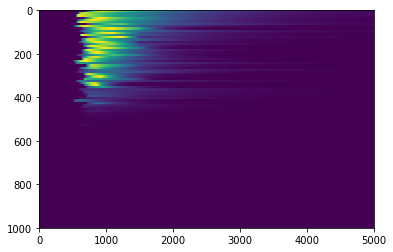

In [13]:
order = np.argsort(orns.mean(axis=1))
plt.imshow(orns[order[::-1],::100], aspect='auto')

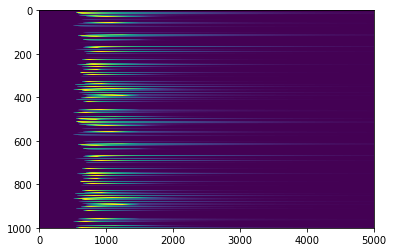

In [14]:
plt.imshow(orns[:,::100], aspect='auto')

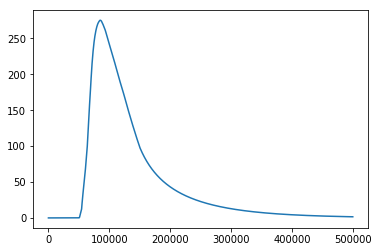

In [23]:
plt.plot(np.matmul(orns.T,np.ones((1000,1))))

In [238]:
ORN_AL = np.zeros((1000,120))
ORN_AL[:,:90] = np.random.choice([0,1],size=(1000,90),p=[0.95,0.05])
ORN_AL[:,90:] = np.random.choice([0,1],size=(1000,30),p=[0.3,0.7])

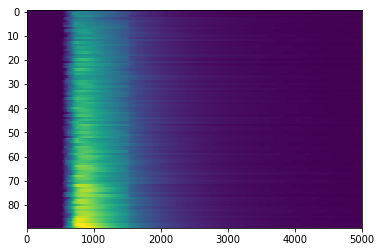

In [239]:
output = np.matmul(orns.T,ORN_AL).T
order = np.argsort(output[:90,:].mean(axis=1))
plt.imshow(output[order,::100], aspect='auto')

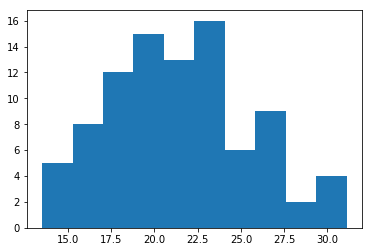

In [240]:
plt.hist(np.max(np.matmul(orns.T,ORN_AL).T[:90,::100],axis=1),bins=10)
plt.show()

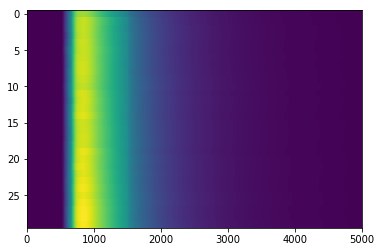

In [241]:
order = np.argsort(output[90:,:].mean(axis=1))
plt.imshow(output[90+order,::100], aspect='auto')

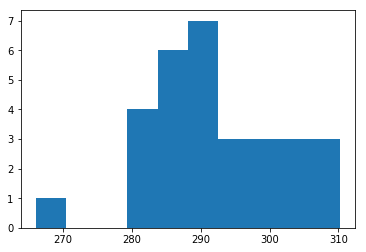

In [242]:
plt.hist(np.max(np.matmul(orns.T,ORN_AL).T[90:,::100],axis=1),bins=10)
plt.show()

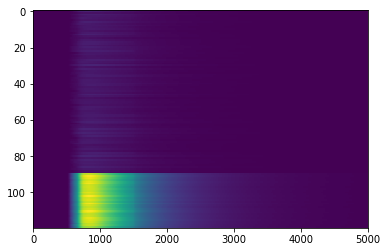

In [243]:
plt.imshow(output[:120,::100], aspect='auto')

In [244]:
PN_scale = 200/output[:90,50000:150000].mean()*0.01743
LN_scale = 200/output[90:,50000:150000].mean()*0.01667

In [245]:
output[:90,:] = output[:90,:] * PN_scale
output[90:,:] = output[90:,:] * LN_scale

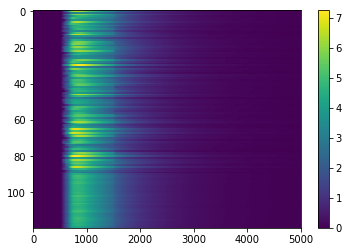

In [246]:
plt.imshow(output[:120,::100], aspect='auto')
plt.colorbar()

In [248]:
np.save('current_input',output)